### HITS 

**HITS**: (Hypertext Induced Topic Search)

Es una medida de importancia similar a PageRank propuesta poco después de ésta última.

PageRank y HITS son 2 soluciones al mismo problema, determinar las páginas más relevantes de una busqueda.  

¿Qué problemas tenían inicialmente los buscadores? (antes de la llegada de Google).

Imaginen que su búsqueda es sobre periódicos. La idea detrás de HITS no sólo es encontrar páginas de periódicos, sino expertos en periódicos.

A diferencia de PageRank, HITS asigna 2 tipos de importancia a cada página (nodo):

- **Hubs**. Su cualidad es que es experto. Un Hub nos dice donde encontrar contenido de un tema.
- **Authorities**. Su cualidad es contenido. Los authorities proveen información de un tema.

¿Qué ejemplos se les ocurren de este tipo de páginas?

La idea es que un buen hub apunta buenos authorities. Reforzando lo anterior, un buen authoritie es apuntado por muchos buenos hub.

Recordemos que las páginas de internet peden verse como un grafo dirigido. Los enlaces entrantes a las páginas pueden verse como votos, y es un proceso recursivo como en PageRank, al igual que en PageRank tiene mayor peso recibir votos (links entrantes) de páginas (nodos) relevantes.

**Algoritmo**

1. Se inicializa asignando un valor de 1 para todos los hub y todos los authorities, es decir,  hub = 1 y auth = 1
2. Iterar hasta la convergencia o hasta $k$ pasos
    - actualizar el valor de $auth(e) = \Sigma hub(a)$ (el valor del auth para cada nodo (edge) es la suma de todos los votos de los hub que lo enlazan)
    - actualizar el valor de $hub(e) = \Sigma auth(a)$ (el valor del hub para cada nodo (edge) es la suma de todos los authorities a los que está enlazado)
    - Para evitar los valores de auth y hub lleguen a infinito se normalizan los valores. El valor de cada auth se divide entre la suma del valor de todos los auth. El valor de cada hub se divide entre la suma del valor de todos los hub.

**Ejemplo sencillo**

actualizar el authority de cada nodo

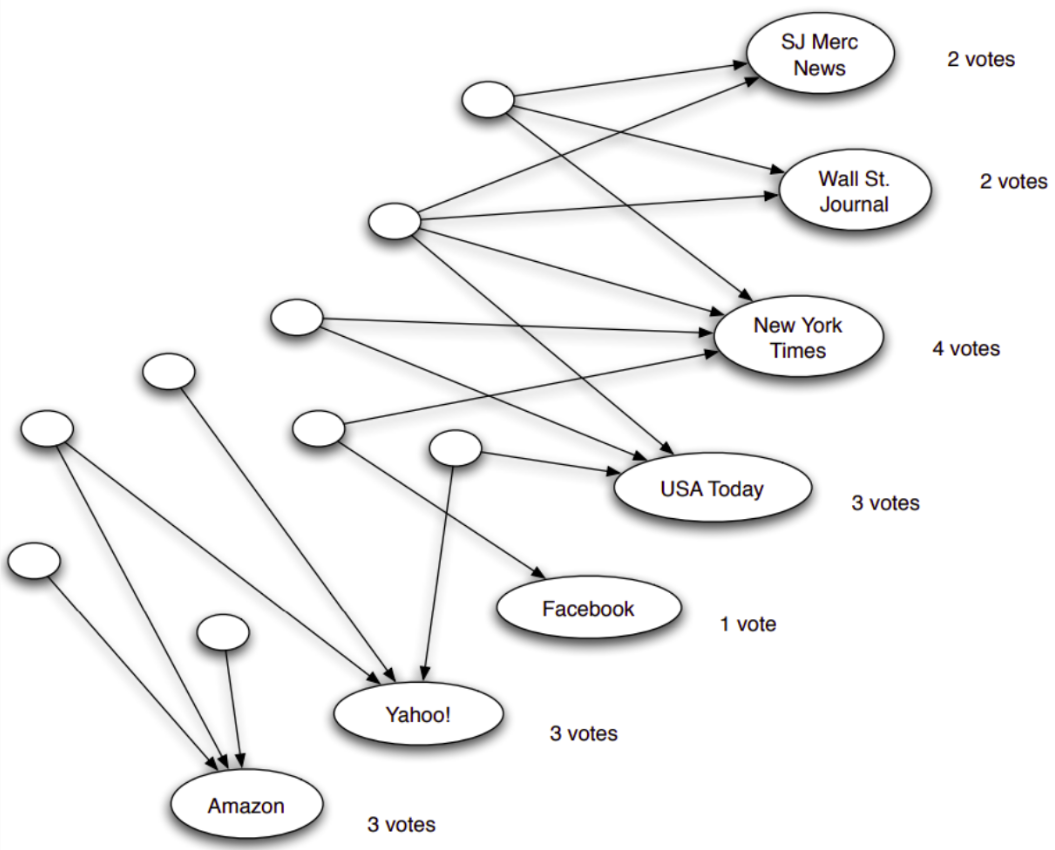

actualizar el hub de cada nodo

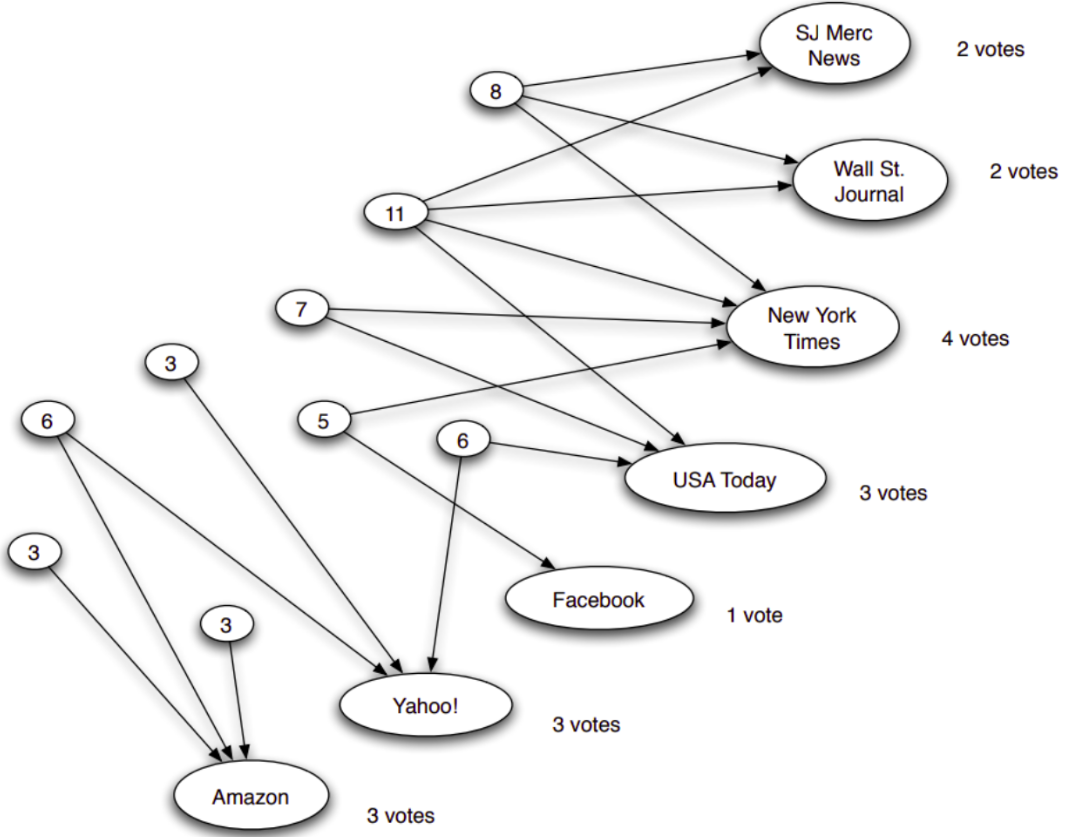

Usando la librería networkx queda de la siguiente manera

In [1]:
# librerías
import networkx as nx 
import matplotlib.pyplot as plt 

Definir grafo dirigido

In [2]:
G = nx.DiGraph()
G.add_edges_from([('H1', 'A1'), ('H1', 'A2'), ('H1', 'A3'),
                 ('H2', 'A1'), ('H2', 'A2'), ('H2', 'A3'),('H2', 'A4'),
                 ('H3', 'A3'), ('H3', 'A4'),
                 ('H4', 'A3'), ('H4', 'A5'),
                 ('H5', 'A4'), ('H5', 'A6'),
                 ('H6', 'A6'),
                 ('H7', 'A6'), ('H7', 'A7'),
                 ('H8', 'A7'), 
                 ('H9', 'A7')]) 


Obtener el número de nodos y relaciones

In [3]:
print(G.number_of_nodes())
print(G.number_of_edges())

16
18


Visualizar el grafo

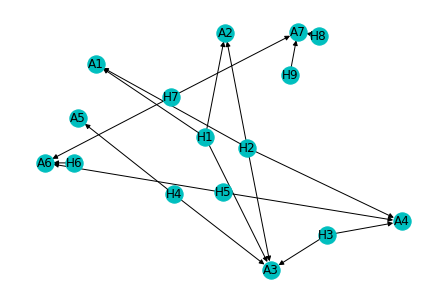

In [5]:
nx.draw(G,node_color='c',edge_color='k', with_labels=True)

Calcular hubs y authorities

In [6]:
hubs, authorities = nx.hits(G) 

In [7]:
hubs

{'H1': 0.24865228102828837,
 'A1': 0.0,
 'A2': 0.0,
 'A3': 0.0,
 'H2': 0.3214693662429811,
 'A4': 0.0,
 'H3': 0.1807031566936301,
 'H4': 0.12308073033567397,
 'A5': 0.0,
 'H5': 0.08766500503312488,
 'A6': 0.0,
 'H6': 0.014847919818432094,
 'H7': 0.017759126828244497,
 'A7': 0.0,
 'H8': 0.0029112070098124047,
 'H9': 0.0029112070098124047}

In [8]:
authorities

{'H1': 0.0,
 'A1': 0.19858495245531008,
 'A2': 0.19858495245531008,
 'A3': 0.30439905207113993,
 'H2': 0.0,
 'A4': 0.2054523944572704,
 'H3': 0.0,
 'H4': 0.0,
 'A5': 0.042871518900732,
 'H5': 0.0,
 'A6': 0.0418931995205832,
 'H6': 0.0,
 'H7': 0.0,
 'A7': 0.008213930139654413,
 'H8': 0.0,
 'H9': 0.0}

Como podemos ver en este ejemplo ideal, los nodos $H$ tienen valor cero de auth y los nodos $A$ tienen valor cero de hub. Dado que cada nodo tiene tanto hub como auth podemos identificar si una página (usuario en una red social) tiene el rol más de ser un enlace a contenido de calidad o proveer contenido de un tema.

**Ejemplo 2**

In [11]:
G = nx.DiGraph()
G.add_edges_from([('Yahoo', 'Yahoo'), ('Yahoo', 'Microsoft'), ('Yahoo', 'Amazon'),
                 ('Amazon', 'Yahoo'), ('Amazon', 'Microsoft'),
                 ('Microsoft', 'Amazon')]) 


Obtener el número de nodos y relaciones

In [12]:
print(G.number_of_nodes())
print(G.number_of_edges())

3
6


Visualizar el grafo

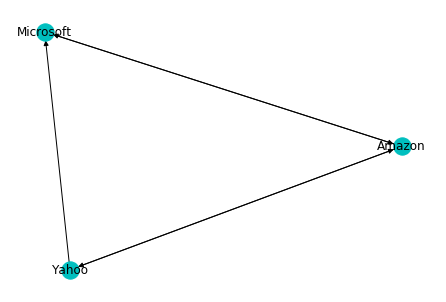

In [13]:
nx.draw(G,node_color='c',edge_color='k', with_labels=True)

Calcular hubs y authorities

In [14]:
hubs, authorities = nx.hits(G) 

In [15]:
hubs

{'Yahoo': 0.5, 'Microsoft': 0.13397459654324317, 'Amazon': 0.3660254034567569}

In [16]:
authorities

{'Yahoo': 0.3660254034567569,
 'Microsoft': 0.3660254034567569,
 'Amazon': 0.26794919308648635}

Contrastar con PageRank

In [17]:
pagerank = nx.pagerank(G)

In [18]:
pagerank

{'Yahoo': 0.3031912902710737,
 'Microsoft': 0.3031912902710737,
 'Amazon': 0.39361741945785217}

En resumen, los hubs son páginas (nodos) que no aportan mucha información de un tema pero sí enlazan a páginas (nodos) que sí lo hace. Los nodos authorities aportan información sobre un tema.

¿Qué usuarios en twitter siguen que tengan rol de hubs y quienes que tengan rol de auth?